In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette("rocket")

In [47]:
import math

def rk2(f, a, b, ini, n=10000):
    h = (b - a)/n
    X = np.linspace(a, b, n)
    y = []
    
    for i in range(len(X)):
        if i == 0:
            k0 = f(ini[0], ini[1])
            k1 = f(ini[0] + h, ini[1] + k0)
        else:
            k0 = f(X[i-1], y[i-1])
            k1 = f(X[i], y[i-1] + k0)
            
        if i == 0:    
            y.append(ini[1] + h*(k0 + k1)/2)
        else:
            y.append(y[i-1] + h*(k0 + k1)/2)
            
    return  pd.DataFrame({"x":X, "f(x)":y})   

In [61]:
f = lambda x, y: -y

A = rk2(f, 0, 5, [0, 1])

<AxesSubplot:xlabel='x', ylabel='f(x)'>

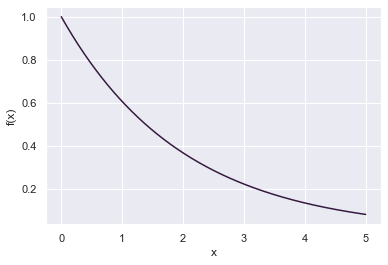

In [62]:
sns.lineplot(data=A, x="x", y="f(x)")

<AxesSubplot:xlabel='x', ylabel='f(x)'>

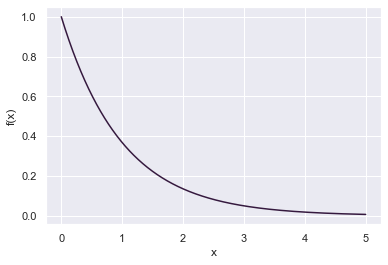

In [63]:
X = np.linspace(0, 5, 1000)
f = lambda x, y: math.exp(x)

y = 1/np.exp(X)

sns.lineplot(data=pd.DataFrame({"x":X, "f(x)":y}), x="x", y="f(x)")